In [20]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
df = pd.read_csv("dataset\\mymoviedb.csv", lineterminator='\n')
#df = pd.read_csv("C:\\ai\\practice\\ML\\dataset\\hiring.csv")
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


1. The dataset is having 9827 rows.
2. Doesn't have any null values
3. We have to convert Release_Date column to Datetime
4. Genre columns have comma seperated genre, in pre-processing ', ' need to remove and the genre should be seperated per record
5. from the dataset we dont require Overview, Original_Language & Poster_Url
6. Vote_Average column should be categorize

In [106]:
df.duplicated().sum() #check if duplicate records
df.dropna(inplace = True)
df.isna().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [107]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [108]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df.Release_Date.dtype)

datetime64[ns]


In [109]:
df['Release_Date'] = df['Release_Date'].dt.year

In [110]:
df['Release_Date']

0       2021
1       2022
2       2022
3       2021
4       2021
        ... 
9822    1973
9823    2020
9824    2016
9825    2021
9826    1984
Name: Release_Date, Length: 9827, dtype: int32

In [111]:
cols = ['Overview','Original_Language','Poster_Url']
df.drop(cols, axis=1, inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [112]:
def categorize_col(df, col, labels):
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']
            ]
    df[col] = pd.cut(df[col], edges, labels= labels, duplicates='drop')
    return df

In [113]:
labels = ['poor','below_average','average','popular']
categorize_col(df, 'Vote_Average', labels)
df['Vote_Average'].unique()

['popular', 'below_average', 'average', 'poor', NaN]
Categories (4, object): ['poor' < 'below_average' < 'average' < 'popular']

In [114]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_average,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [115]:
df['Vote_Average'].value_counts()

Vote_Average
poor             2467
popular          2450
average          2412
below_average    2398
Name: count, dtype: int64

In [120]:
df['Genre'] = df['Genre'].str.split(', ') #convert to list
df = df.explode('Genre').reset_index(drop=True)
df

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery
...,...,...,...,...,...,...
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama


In [121]:
print(df['Genre'].dtypes) #data type is object will covert it to category
df['Genre'] = df['Genre'].astype('category')
print(df['Genre'].dtypes)

object
category


In [122]:
df.info() #after we have splitted Genre column, data-size increased

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25793 non-null  int32   
 1   Title         25793 non-null  object  
 2   Popularity    25793 non-null  float64 
 3   Vote_Count    25793 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25793 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 756.7+ KB


In [ ]:
df.nunique() # will give unique records per column

Release_Date     102
Title           9513
Popularity      8160
Vote_Count      3266
Vote_Average       4
Genre             19
dtype: int64

What is the most frequent genere of movies released on Netflix?

In [123]:
df['Genre'].describe()

count     25793
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

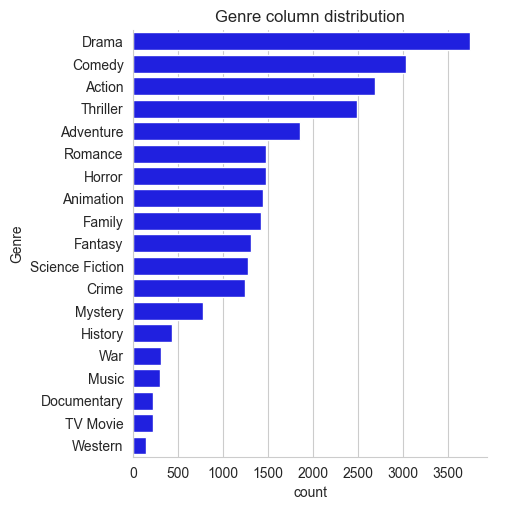

In [128]:
sns.set_style('whitegrid')
sns.catplot(y= 'Genre', data= df, kind='count', order= df['Genre'].value_counts().index, color='blue')
plt.title("Genre column distribution")
plt.show()

from above graph we can observe that Dram genre is most frequent genre

2. Which has highest votes in Vote_average column

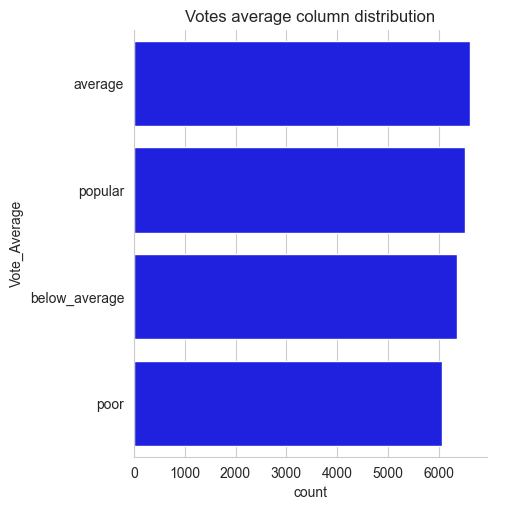

In [129]:
sns.catplot(y= 'Vote_Average', data= df, kind='count', order= df['Vote_Average'].value_counts().index, color='blue')
plt.title("Votes average column distribution")
plt.show()

3. What movie got highest popularity? What it's Genres?

In [132]:
print(df['Popularity'].max())
df[df['Popularity'] == df['Popularity'].max()]

5083.954


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


4. What movie got lowest popularity? What it's Genres?

In [133]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama
25792,1984,Threads,13.354,186,popular,Science Fiction


5. Which year has most filmmed movies?

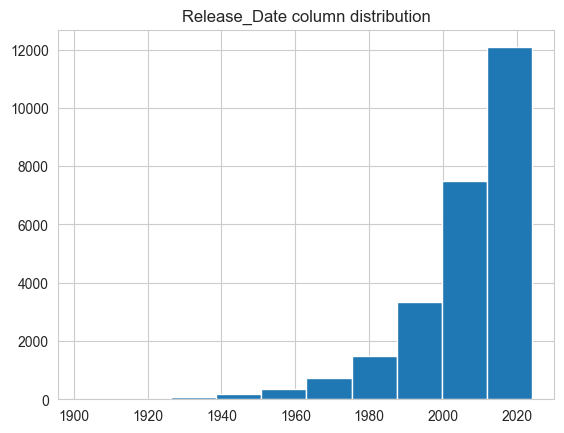

In [ ]:
df['Release_Date'].hist()
plt.title("Release_Date column distribution")
plt.show()

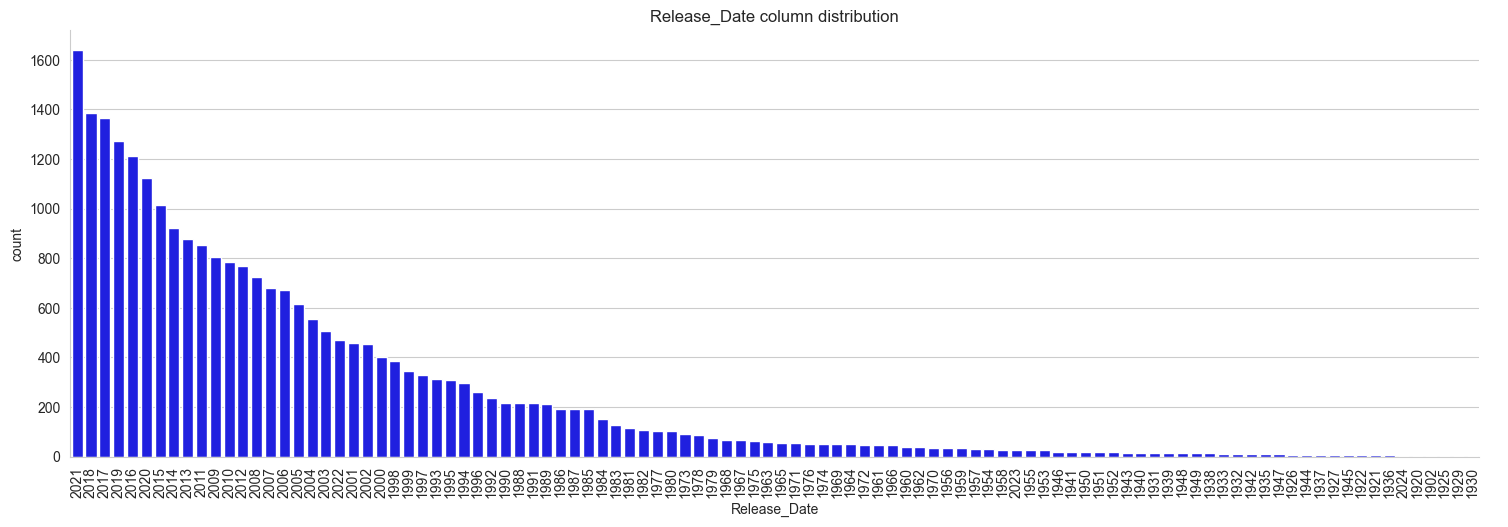

In [152]:
#plt.figure(figsize=(4, 4))
g= sns.catplot(x= 'Release_Date', data= df, kind='count', order= df['Release_Date'].value_counts().index, color='blue', aspect=3)
g.set_xticklabels(rotation=90)
plt.title("Release_Date column distribution")
plt.show()

from above plotted graph, year 2021 has most movies released